# More plotting with pandas/Matplotlib



At this point you should know the basics of making plots with pandas and the Matplotlib module. Now we will expand on our basic plotting skills to learn how to create more advanced plots. In this part, we will show how to visualize data using pandas/Matplotlib and create plots like the one below.

This script has adapted or reused material from University of Helsinki Geo-python course (https://geo-python-site.readthedocs.io/en/latest/course-info/licensing.html ) under a Creative Commons Attribution-ShareAlike 4.0 International licence.




## Input data

In this part of the lesson we'll continue working with the same climate data from the Nordics we used in the first part of the lecture).


## Getting started

Let's start again by importing the libraries we'll need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

Now we'll load the data just as we did in the first part of the lesson: 
- Set whitespace as the delimiter
- Specify the no data values
- Specify a subset of columns
- Parse the `'YR--MODAHRMN'` column as a datetime index

Reading in the data might take a few moments.

In [5]:
# IGNORE THIS CELL
# It is only needed to generate the course website
fp = "nordics_weather.csv"

In [6]:
data = pd.read_csv(
    fp,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["country", "date", "precipitation","snow_depth", "tavg", "tmax", "tmin"],
    parse_dates=["date"],
    index_col="date",
)

In [7]:
print(f"Number of rows: {len(data)}")

Number of rows: 5478


As you can see, we are dealing with a relatively large data set.

Let's have a closer look at the time first rows of data.

In [8]:
data.head()

,country,precipitation,snow_depth,tavg,tmax,tmin
date,,,,,,
2015-01-01,Finland,1.714141,284.545455,1.428571,2.912739,-1.015287
2015-01-02,Finland,10.016667,195.000000,0.553571,2.358599,-0.998718
2015-01-03,Finland,3.956061,284.294118,-1.739286,0.820382,-3.463871
2015-01-04,Finland,0.246193,260.772727,-7.035714,-3.110828,-9.502581
2015-01-05,Finland,0.036364,236.900000,-17.164286,-8.727564,-19.004487


Let's rename the `'tavg'` column as `tavg_F`, since we'll later convert our temperatures from Celsius to Fahrenheit.

In [11]:
new_names = {"tavg": "tavg_F"}
data = data.rename(columns=new_names)

Check again the first rows of data to confirm successful renaming.

In [12]:
data.head()

,country,precipitation,snow_depth,tavg_F,tmax,tmin
date,,,,,,
2015-01-01,Finland,1.714141,284.545455,1.428571,2.912739,-1.015287
2015-01-02,Finland,10.016667,195.000000,0.553571,2.358599,-0.998718
2015-01-03,Finland,3.956061,284.294118,-1.739286,0.820382,-3.463871
2015-01-04,Finland,0.246193,260.772727,-7.035714,-3.110828,-9.502581
2015-01-05,Finland,0.036364,236.900000,-17.164286,-8.727564,-19.004487


## Preparing the data

First, we have to deal with no data values. Let's check how many no data values we have.

In [13]:
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
country          0
precipitation    2
snow_depth       2
tavg_F           1
tmax             0
tmin             3
dtype: int64


So, we have 1 missing value in the TEMP_F column. Let's get rid of those. We need not worry about the no data values in the `'MAX'` and `'MIN'` columns since we won't be using them for plotting. 

We can remove rows from our DataFrame where `'tavg_F'` is missing values using the `dropna()` method, as shown below.

In [14]:
data.dropna(subset=["tavg_F"], inplace=True)

In [15]:
print(f"Number of rows after removing no data values: {len(data)}")

Number of rows after removing no data values: 5477


### Check your understanding

What would happen if we removed all rows with any no data values from our data (also considering no data values in the `MAX` and `MIN` columns)?

In [16]:
# After removing all no data values we are left with only a fraction of the original data.
# Note! Here we are not applying .dropna() "inplace"
#       so we are not making any permanent changes to our DataFrame.
print(f"If we drop all rows with no data values we have {len(data.dropna())} rows left in our DataFrame.")
print(f"If we drop only the missing TEMP_F values we have {len(data)} rows in our DataFrame.")

If we drop all rows with no data values we have 5470 rows left in our DataFrame.
If we drop only the missing TEMP_F values we have 5477 rows in our DataFrame.


### Converting temperatures to Fahreneit

Now that we have loaded our data, we can convert the values of temperature from Celsuys to Fahrenheit, like we have in earlier lessons.

In [17]:
data["tavg_F"] = (data["tavg_F"] *1.8 ) + 32.0

Let's check how our dataframe looks like at this point:

In [18]:
data.head()

,country,precipitation,snow_depth,tavg_F,tmax,tmin
date,,,,,,
2015-01-01,Finland,1.714141,284.545455,34.571429,2.912739,-1.015287
2015-01-02,Finland,10.016667,195.000000,32.996429,2.358599,-0.998718
2015-01-03,Finland,3.956061,284.294118,28.869286,0.820382,-3.463871
2015-01-04,Finland,0.246193,260.772727,19.335714,-3.110828,-9.502581
2015-01-05,Finland,0.036364,236.900000,1.104286,-8.727564,-19.004487


## Using subplots

Let's continue working with the weather data and learn how to use *subplots*. Subplots are figures where you have multiple plots in different panels of the same figure, as was shown at the start of the lesson.

### Extracting seasonal temperatures

Let's now select data from different seasons of the year in 2012/2013:

- Winter (December 2012 - February 2013)
- Spring (March 2013 - May 2013)
- Summer (June 2013 - August 2013)
- Autumn (Septempber 2013 - November 2013)

In [19]:
winter = data.loc[(data.index >= "12-01-2017") & (data.index < "03-01-2018")]   
winter_temps = winter["tavg_F"]

spring = data.loc[(data.index >= "03-01-2018") & (data.index < "06-01-2018")]
spring_temps = spring["tavg_F"]

summer = data.loc[(data.index >= "06-01-2018") & (data.index < "09-01-2018")]
summer_temps = summer["tavg_F"]

autumn = data.loc[(data.index >= "09-01-2018") & (data.index < "12-01-2018")]
autumn_temps = autumn["tavg_F"]

Now we can plot our data to see how the different seasons look separately.

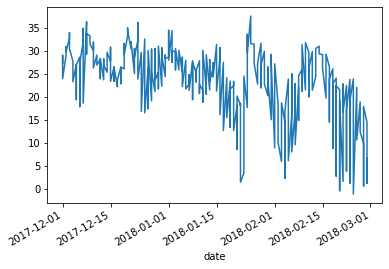

In [20]:
ax1 = winter_temps.plot()

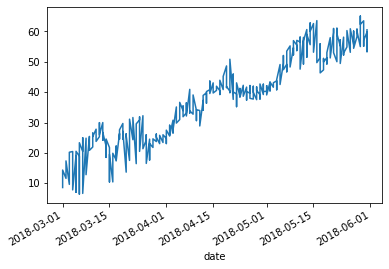

In [21]:
ax2 = spring_temps.plot()

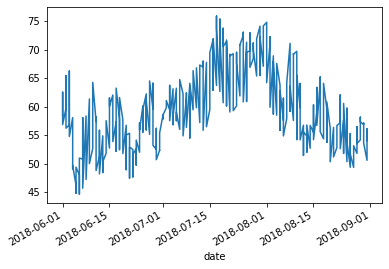

In [22]:
ax3 = summer_temps.plot()

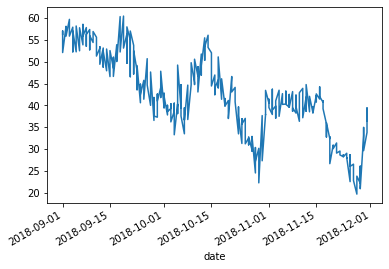

In [23]:
ax4 = autumn_temps.plot()

OK, so from these plots we can already see that the temperatures the four seasons are quite different, which is rather obvious of course. It is important to also notice that the scale of the *y*-axis changes in these four plots. If we would like to compare different seasons to each other we need to make sure that the temperature scale is similar in the plots for each season.

### Finding data bounds

Let's set our *y*-axis limits so that the upper limit is the maximum temperature + 5 degrees in our data (full year), and the lowest is the minimum temperature - 5 degrees.

In [24]:
# Find lower limit for y-axis
min_temp = min(
    winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()
)
min_temp = min_temp - 5.0

# Find upper limit for y-axis
max_temp = max(
    winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()
)
max_temp = max_temp + 5.0

# Print y-axis min, max
print(f"Min: {min_temp}, Max: {max_temp}")

Min: -6.113571426, Max: 80.93285714800001


We can now use this temperature range to standardize the y-axis range on our plot.

### Creating our first set of subplots

Let's now continue and see how we can plot all these different plots into the same figure. We can create a 2x2 panel for our visualization using Matplotlib’s `subplots()` function where we specify how many rows and columns we want to have in our figure. We can also specify the size of our figure with `figsize` parameter as we have seen earlier with pandas. As a reminder, `figsize` takes the `width` and `height` values (in inches) as inputs.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

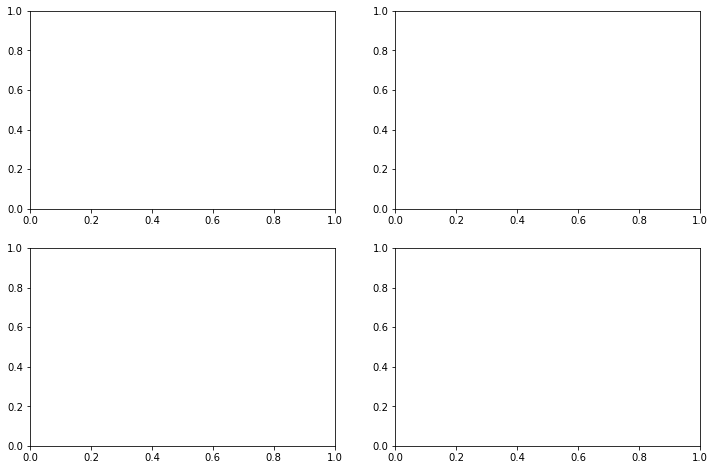

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes

We can see that as a result we have now a list containing two nested lists where the first one contains the axis for column 1 and 2 on **row 1** and the second list contains the axis for columns 1 and 2 for **row 2**.

We can parse these axes into their own variables so it is easier to work with them.

In [26]:
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

Now we have four axis variables for the different panels in our figure. Next we can use them to plot the seasonal data. Let's begin by plotting the seasons, and give different colors for the lines and specify the *y*-axis range to be the same for all subplots. We can do this using what we know and some parameters below:

- The `c` parameter changes the color of the line. Matplotlib has a [large list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) you can consult to customize your color scheme.
- The `lw` parameter controls the width of the lines
- The `ylim` parameter controls the y-axis range

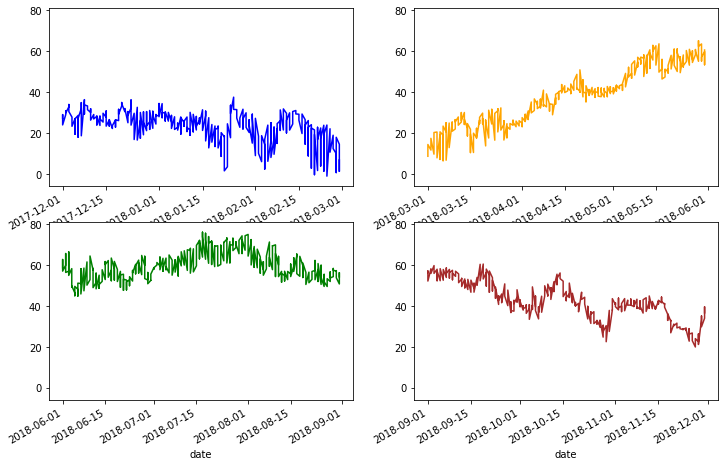

In [27]:
# Set the plot line width
line_width = 1.5

# Plot data
winter_temps.plot(ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp])
spring_temps.plot(ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp])
summer_temps.plot(ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp])
autumn_temps.plot(ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp])

# Display the figure
fig

Great, now we have all the plots in same figure! However, we can see that there are some problems with our *x*-axis labels and a few missing items we can add. Let's do that below.

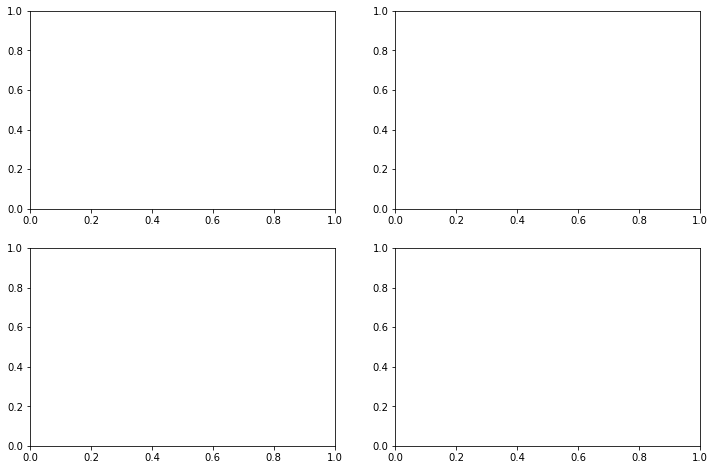

In [28]:
# Create the new figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

Now, we'll add our seasonal temperatures to the plot commands for each time period.

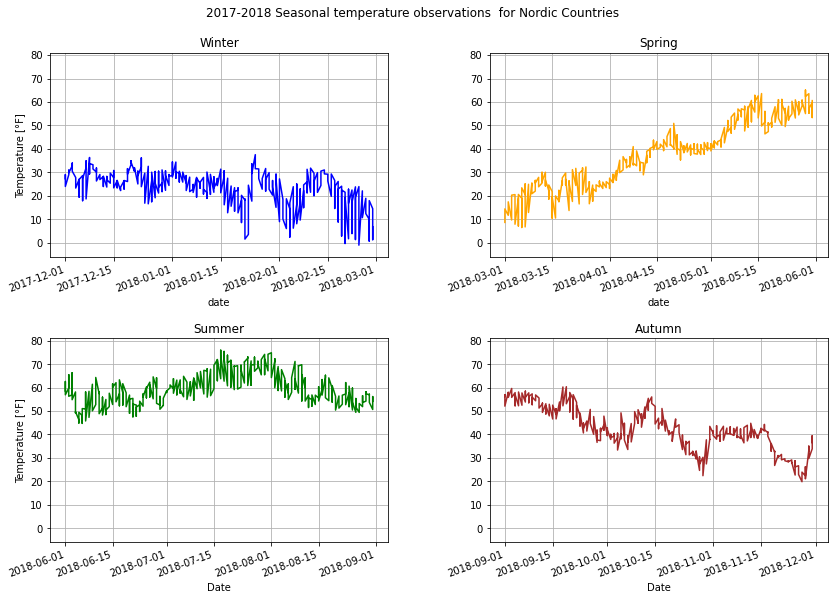

In [29]:
# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(
    ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
spring_temps.plot(
    ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
summer_temps.plot(
    ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
autumn_temps.plot(
    ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp], grid=True
)

# Set figure title
fig.suptitle("2017-2018 Seasonal temperature observations  for Nordic Countries")

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")
ax11.set_ylabel("Temperature [°F]")
ax21.set_ylabel("Temperature [°F]")

# Season label text
ax11.set_title("Winter")
ax12.set_title('Spring')
ax21.set_title('Summer')
ax22.set_title('Autumn')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

#ax11.text("12-01-2017", -25, "Winter")
#ax12.text(pd.to_datetime("20130515"), -25, "Spring")
#ax21.text(pd.to_datetime("20130815"), -25, "Summer")
#ax22.text(pd.to_datetime("20131115"), -25, "Autumn")

# Display plot
fig

### Check your understading

Visualize winter and summer temperatures in a 1x2 panel figure.
Save the figure as a .png file.

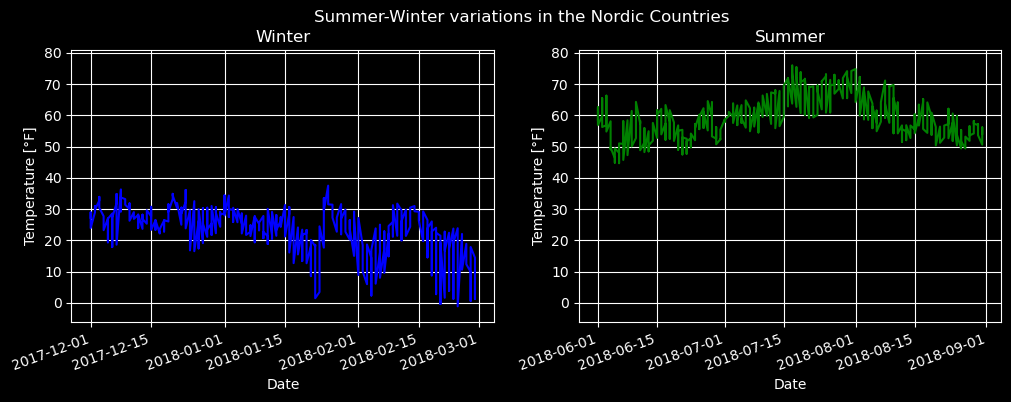

In [53]:
# Two subplots side-by-side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(
    ax=axs[0], c="blue", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
summer_temps.plot(
    ax=axs[1], c="green", lw=line_width, ylim=[min_temp, max_temp], grid=True
)

# Set figure title
fig.suptitle(
    "Summer-Winter variations in the Nordic Countries"
)

# Rotate the x-axis labels so they don't overlap
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=20)

# Axis labels
axs[0].set_xlabel("Date")
axs[1].set_xlabel("Date")
axs[0].set_ylabel("Temperature [°F]")
axs[1].set_ylabel("Temperature [°F]")

# Season label text
axs[0].set_title("Winter")
axs[1].set_title("Summer")

plt.savefig("Summer_Winter.png")

## Extra: pandas/Matplotlib plot style sheets

One cool thing about plotting using pandas/Matplotlib is that is it possible to change the overall style of your plot to one of several available plot style options very easily. Let's consider an example below using the four-panel plot we produced in this lesson.

We will start by defining the plot style, using the `'dark_background'` plot style here.

In [51]:

plt.style.use("dark_background")

There is no output from this command, but now when we create a plot it will use the `dark_background` styling. Let's see what that looks like.

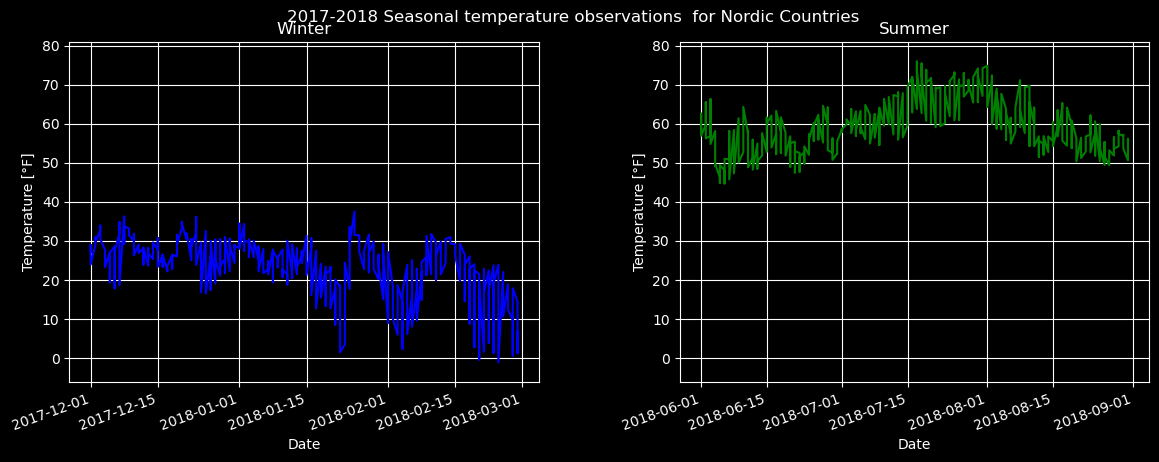

In [54]:
# Create the new figure and subplots
# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(
    ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
spring_temps.plot(
    ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
summer_temps.plot(
    ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
autumn_temps.plot(
    ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp], grid=True
)

# Set figure title
fig.suptitle("2017-2018 Seasonal temperature observations  for Nordic Countries")

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")
ax11.set_ylabel("Temperature [°F]")
ax21.set_ylabel("Temperature [°F]")

# Season label text
ax11.set_title("Winter")
ax12.set_title('Spring')
ax21.set_title('Summer')
ax22.set_title('Autumn')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

#ax11.text("12-01-2017", -25, "Winter")
#ax12.text(pd.to_datetime("20130515"), -25, "Spring")
#ax21.text(pd.to_datetime("20130815"), -25, "Summer")
#ax22.text(pd.to_datetime("20131115"), -25, "Autumn")

# Display plot
fig

As you can see, the plot format has now changed to use the `dark_background` style. You can find other plot style options in the [complete list of available Matplotlib style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Have fun!